In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [6]:
df = pd.read_csv('Bakery.csv')

In [7]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   TransactionNo          Items             DateTime  Daypart  DayType
0              1          Bread  2016-10-30 09:58:11  Morning  Weekend
1              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
2              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
3              3  Hot chocolate  2016-10-30 10:07:57  Morning  Weekend
4              3            Jam  2016-10-30 10:07:57  Morning  Weekend

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
None

Missing values:
TransactionNo    0
Items            0
DateTime 

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Date'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

popular_items = df['Items'].value_counts().head(10)
popular_items

Items
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: count, dtype: int64

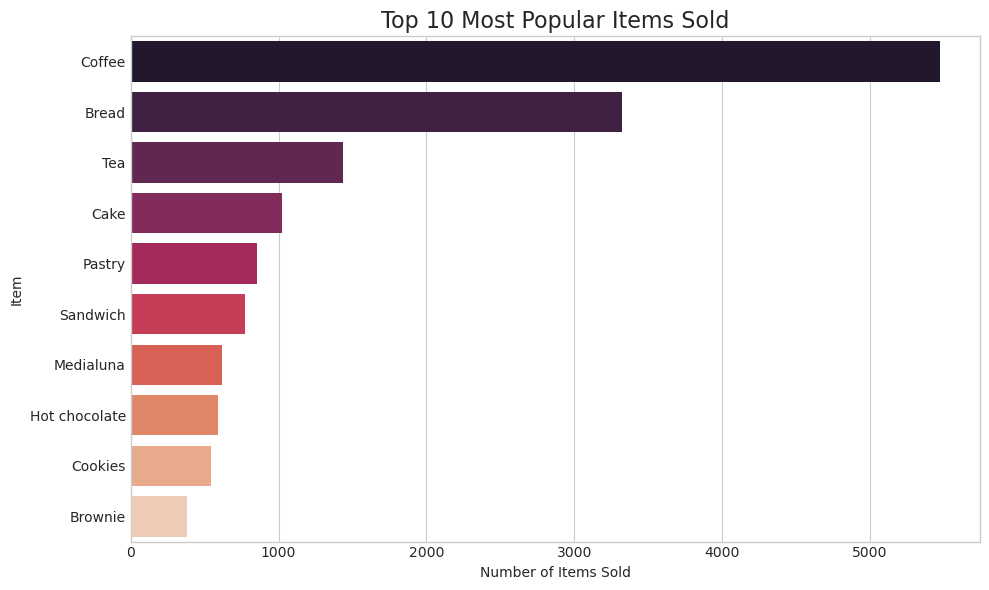

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_items.values, y=popular_items.index, palette="rocket")
plt.title("Top 10 Most Popular Items Sold", fontsize=16)
plt.xlabel("Number of Items Sold")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

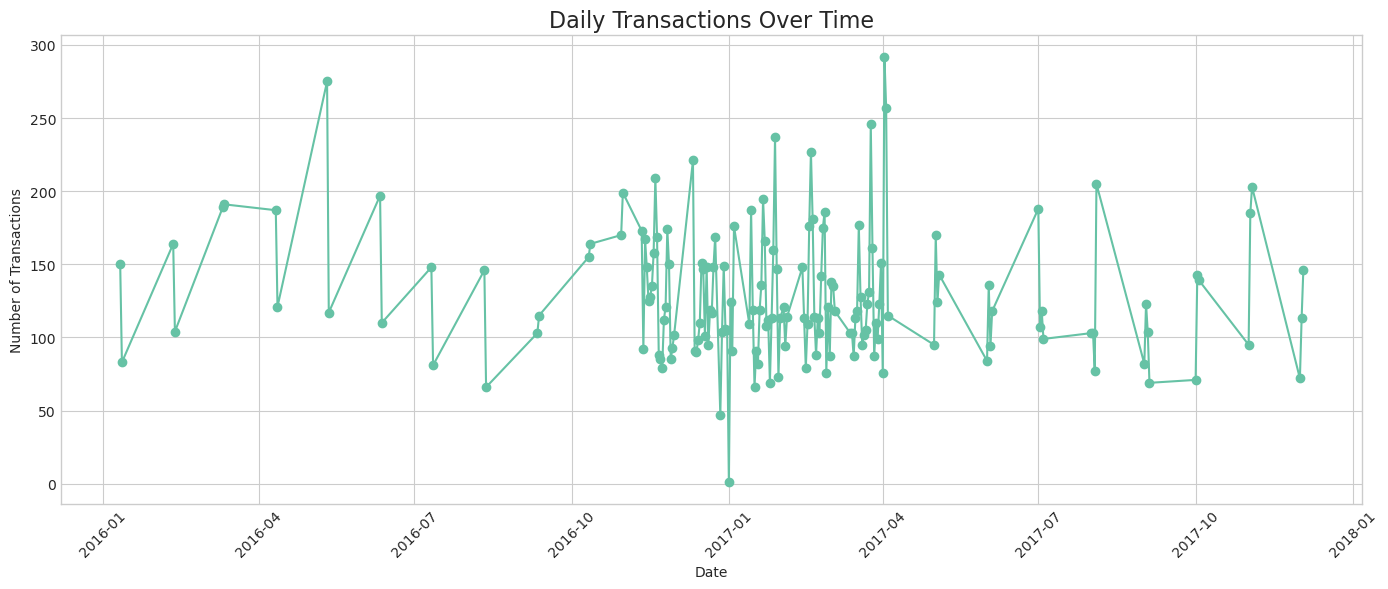

In [10]:
daily_sales = df.groupby('Date').size()
plt.figure(figsize=(14, 6))
daily_sales.plot(kind='line', marker='o')
plt.title("Daily Transactions Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


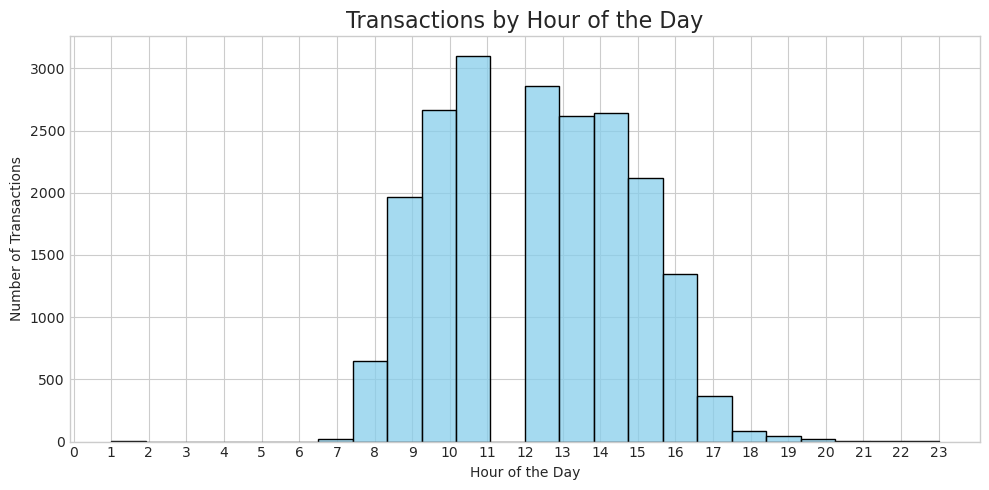

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=False, color="skyblue")
plt.title("Transactions by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

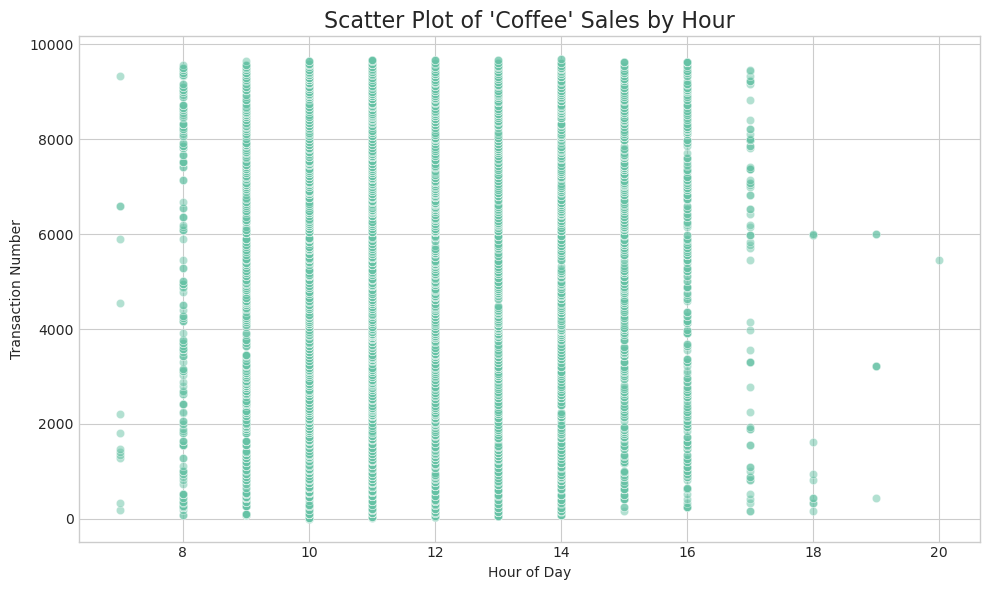

In [12]:
top_item = popular_items.index[0]
top_item_data = df[df['Items'] == top_item]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_item_data['Hour'], y=top_item_data['TransactionNo'], alpha=0.5)
plt.title(f"Scatter Plot of '{top_item}' Sales by Hour", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Number")
plt.tight_layout()
plt.show()